# Pipeline Project

In [32]:
#from google.colab import drive
#drive.mount('/content/drive/')

In [33]:
#path= Path('/content/drive/My Drive/NLP/starter/data')## Loading data

You will be using the provided data to create a machine learning model pipeline.

You must handle the data appropriately in your pipeline to predict whether an
item is recommended by a customer based on their review.
Note the data includes numerical, categorical, and text data.

You should ensure you properly train and evaluate your model.

## The Data

The dataset has been anonymized and cleaned of missing values.

There are 8 features for to use to predict whether a customer recommends or does
not recommend a product.
The `Recommended IND` column gives whether a customer recommends the product
where `1` is recommended and a `0` is not recommended.
This is your model's target/

The features can be summarized as the following:

- **Clothing ID**: Integer Categorical variable that refers to the specific piece being reviewed.
- **Age**: Positive Integer variable of the reviewers age.
- **Title**: String variable for the title of the review.
- **Review Text**: String variable for the review body.
- **Positive Feedback Count**: Positive Integer documenting the number of other customers who found this review positive.
- **Division Name**: Categorical name of the product high level division.
- **Department Name**: Categorical name of the product department name.
- **Class Name**: Categorical name of the product class name.

The target:
- **Recommended IND**: Binary variable stating where the customer recommends the product where 1 is recommended, 0 is not recommended.

In [34]:
! python -m spacy download en_core_web_sm

     |████████████████████████████████| 12.8 MB 3.5 MB/s eta 0:00:01
✔ Download and installation successful
You can now load the package via spacy.load('en_core_web_sm')


In [35]:
import spacy

nlp = spacy.load('en_core_web_sm')

In [36]:
### for speeding testing will be removed
#originaldf = pd.read_csv('data/reviews.csv')
#data = originaldf.iloc[:100,:]
#data.to_csv('reviews_mini.csv', index=False)


## Load Data

In [37]:
import pandas as pd

# Load data
#df = pd.read_csv('/content/drive/My Drive/NLP/starter/data/reviews.csv')
df = pd.read_csv('data/reviews.csv')

df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18442 entries, 0 to 18441
Data columns (total 9 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   Clothing ID              18442 non-null  int64 
 1   Age                      18442 non-null  int64 
 2   Title                    18442 non-null  object
 3   Review Text              18442 non-null  object
 4   Positive Feedback Count  18442 non-null  int64 
 5   Division Name            18442 non-null  object
 6   Department Name          18442 non-null  object
 7   Class Name               18442 non-null  object
 8   Recommended IND          18442 non-null  int64 
dtypes: int64(4), object(5)
memory usage: 1.3+ MB


,Clothing ID,Age,Title,Review Text,Positive Feedback Count,Division Name,Department Name,Class Name,Recommended IND
0,1077,60,Some major design flaws,I had such high hopes for this dress and reall...,0,General,Dresses,Dresses,0
1,1049,50,My favorite buy!,"I love, love, love this jumpsuit. it's fun, fl...",0,General Petite,Bottoms,Pants,1
2,847,47,Flattering shirt,This shirt is very flattering to all due to th...,6,General,Tops,Blouses,1
3,1080,49,Not for the very petite,"I love tracy reese dresses, but this one is no...",4,General,Dresses,Dresses,0
4,858,39,Cagrcoal shimmer fun,I aded this in my basket at hte last mintue to...,1,General Petite,Tops,Knits,1


## Preparing features (`X`) & target (`y`)

In [38]:
data = df

# separate features from labels
X = data.drop('Recommended IND', axis=1)
y = data['Recommended IND'].copy()

print('Labels:', y.unique())
print('Features:')
display(X.head())

Labels: [0 1]
Features:


,Clothing ID,Age,Title,Review Text,Positive Feedback Count,Division Name,Department Name,Class Name
0,1077,60,Some major design flaws,I had such high hopes for this dress and reall...,0,General,Dresses,Dresses
1,1049,50,My favorite buy!,"I love, love, love this jumpsuit. it's fun, fl...",0,General Petite,Bottoms,Pants
2,847,47,Flattering shirt,This shirt is very flattering to all due to th...,6,General,Tops,Blouses
3,1080,49,Not for the very petite,"I love tracy reese dresses, but this one is no...",4,General,Dresses,Dresses
4,858,39,Cagrcoal shimmer fun,I aded this in my basket at hte last mintue to...,1,General Petite,Tops,Knits


## Data Exploration

<font color='blue'><b>since the dataset has been anonymized and cleaned of missing values, there should be null or missing values</b></font>

In [39]:
X.dtypes

Clothing ID                 int64
Age                         int64
Title                      object
Review Text                object
Positive Feedback Count     int64
Division Name              object
Department Name            object
Class Name                 object
dtype: object

<font color='blue'>So, we have numerical(Age,Positive Feedback Count), categorial(Clothing ID, i guess it's categorial more than being numerical,Department Name , Division Name ,Class Name) and text data(Title, Review Text)</font>

In [40]:
# Split data into train and test sets
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X,
    y,
    test_size=0.1,
    shuffle=True,
    random_state=27,
)

## Building Pipeline

# 1- Splitting Numerical, Categorical, and Text Data

Need to separate the data into the different feature types so we can better process & utilize them as features for our model

- Numerical: `num_features`
- Categorical: `cat_features`
- Text: `text_features`

In [41]:
num_features = (
    X
    .select_dtypes(exclude=['object']).columns
    .drop(
        [
            'Clothing ID', # More of category than a numerical feature
        ],
    )
)
print('Numerical features:', num_features)

cat_features = (
    X[[
        'Clothing ID',
        'Division Name',
        'Department Name',
        'Class Name',
    ]].columns
)
print('Categorical features:', cat_features)


text_features = (
    X[[
       'Title',
        'Review Text'
    ]].columns
)
print ('Review Text features:', text_features)

Numerical features: Index(['Age', 'Positive Feedback Count'], dtype='object')
Categorical features: Index(['Clothing ID', 'Division Name', 'Department Name', 'Class Name'], dtype='object')
Review Text features: Index(['Title', 'Review Text'], dtype='object')


# Defining pipelines for each features group

## Numerical Features Pipeline

In [42]:
from sklearn.pipeline import Pipeline
# define pipeline for numerical features
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import MinMaxScaler

num_pipeline = Pipeline([
    (
        'imputer',
        SimpleImputer(strategy='mean'),
    ),
    (
        'scaler',
        MinMaxScaler(),
    ),
])

num_pipeline

Pipeline(steps=[('imputer', SimpleImputer()), ('scaler', MinMaxScaler())])

## Categorical Features Pipeline

In [43]:
# define pipeline for categorical features
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import OneHotEncoder

cat_pipeline = Pipeline([
    (
        'ordinal_encoder',
        OrdinalEncoder(
            handle_unknown='use_encoded_value',
            unknown_value=-1,
        )
    ),
    (
        'imputer',
        SimpleImputer(
            strategy='most_frequent',
        )
    ),
    (
        'cat_encoder',
        OneHotEncoder(
            sparse_output=False,
            handle_unknown='ignore',
        )
    ),
])

cat_pipeline

Pipeline(steps=[('ordinal_encoder',
                 OrdinalEncoder(handle_unknown='use_encoded_value',
                                unknown_value=-1)),
                ('imputer', SimpleImputer(strategy='most_frequent')),
                ('cat_encoder',
                 OneHotEncoder(handle_unknown='ignore', sparse_output=False))])

## Text Feature Pipeline

In [44]:
from sklearn.pipeline import FeatureUnion
from sklearn.preprocessing import FunctionTransformer
from sklearn.feature_extraction.text import CountVectorizer
import numpy as np

initial_text_preprocess = Pipeline([
    (
        'dimension_reshaper',
        FunctionTransformer(
            np.reshape,
            kw_args={'newshape':-1},
        ),
    ),
])

feature_engineering = FeatureUnion([
   # ('count_spaces', CountCharacter(character=' ')),
   # ('count_exclamations', CountCharacter(character='!')),
   # ('count_question_marks', CountCharacter(character='?')),
    ('countVectorizer',CountVectorizer()),
])

text_pipeline = Pipeline([
    (
        'initial_text_preprocess',
        initial_text_preprocess,
    ),
    (
        'feature_engineering',
        feature_engineering,
    ),
])
text_pipeline

Pipeline(steps=[('initial_text_preprocess',
                 Pipeline(steps=[('dimension_reshaper',
                                  FunctionTransformer(func=<function reshape at 0x7419cc9e4a70>,
                                                      kw_args={'newshape': -1}))])),
                ('feature_engineering',
                 FeatureUnion(transformer_list=[('countVectorizer',
                                                 CountVectorizer())]))])

### Custom Transformer 4: spaCy and TF-IDF

Next we use TF-IDF to get a vector representation of the review text.

But before we use TF-IDF, we will implement lemmatization. This way words like 'good' and 'better' are converted to the same value. This representation will carry over into TF-IDF.


In [45]:
class SpacyLemmatizer(BaseEstimator, TransformerMixin):
    def __init__(self, nlp):
        self.nlp = nlp

    def fit(self, X, y=None):
        return self

    def transform(self, X):
        lemmatized = [
            ' '.join(
                token.lemma_ for token in doc
                if not token.is_stop
            )
            for doc in self.nlp.pipe(X)
        ]
        return lemmatized

In [46]:
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf_pipeline = Pipeline([
    (
        'dimension_reshaper',
        FunctionTransformer(
            np.reshape,
            kw_args={'newshape':-1},
        ),
    ),
    (
        'lemmatizer',
        SpacyLemmatizer(nlp=nlp),
    ),
    (
        'tfidf_vectorizer',
        TfidfVectorizer(
            stop_words='english',
            lowercase= True
        ),
    ),
])
tfidf_pipeline

Pipeline(steps=[('dimension_reshaper',
                 FunctionTransformer(func=<function reshape at 0x7419cc9e4a70>,
                                     kw_args={'newshape': -1})),
                ('lemmatizer',
                 SpacyLemmatizer(nlp=<spacy.lang.en.English object at 0x74196605d700>)),
                ('tfidf_vectorizer', TfidfVectorizer(stop_words='english'))])

## Combine Feature Engineering Pipelines

In [47]:
from sklearn.compose import ColumnTransformer

feature_engineering = ColumnTransformer([
        ('num', num_pipeline, num_features),
        ('cat', cat_pipeline, cat_features),
        #('text', text_pipeline, text_features),
        ('text0', text_pipeline, text_features[0]),
        ('text1', text_pipeline, text_features[1]),
        #('tfidf_text', tfidf_pipeline, text_features),
        ('tfidf_text', tfidf_pipeline, text_features[0]), # Apply tfidf_pipeline to 'Title'
        ('tfidf_text2', tfidf_pipeline, text_features[1]), # Apply tfidf_pipeline to 'Review Text'
], remainder='drop' )

feature_engineering

ColumnTransformer(transformers=[('num',
                                 Pipeline(steps=[('imputer', SimpleImputer()),
                                                 ('scaler', MinMaxScaler())]),
                                 Index(['Age', 'Positive Feedback Count'], dtype='object')),
                                ('cat',
                                 Pipeline(steps=[('ordinal_encoder',
                                                  OrdinalEncoder(handle_unknown='use_encoded_value',
                                                                 unknown_value=-1)),
                                                 ('imputer',
                                                  SimpleImputer(strategy='most_frequent')),
                                                 ('cat_encoder',
                                                  OneHot...
                                                 ('tfidf_vectorizer',
                                                  TfidfVectorizer(stop_words='english'))]),
                                 'Title'),
                                ('tfidf_text2',
                                 Pipeline(steps=[('dimension_reshaper',
                                                  FunctionTransformer(func=<function reshape at 0x7419cc9e4a70>,
                                                                      kw_args={'newshape': -1})),
                                                 ('lemmatizer',
                                                  SpacyLemmatizer(nlp=<spacy.lang.en.English object at 0x74196605d700>)),
                                                 ('tfidf_vectorizer',
                                                  TfidfVectorizer(stop_words='english'))]),
                                 'Review Text')])

## Training Pipeline

 we will append a machine learning model (a classifier) to be trained with the features engineering pipeline
, we specifically will use a RandomForestClassifier



In [48]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.pipeline import make_pipeline

model_pipeline = make_pipeline(
    feature_engineering,
    RandomForestClassifier(random_state=27),
)

model_pipeline.fit(X_train, y_train)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer()),
                                                                  ('scaler',
                                                                   MinMaxScaler())]),
                                                  Index(['Age', 'Positive Feedback Count'], dtype='object')),
                                                 ('cat',
                                                  Pipeline(steps=[('ordinal_encoder',
                                                                   OrdinalEncoder(handle_unknown='use_encoded_value',
                                                                                  unknown_value=-1)),
                                                                  ('imputer',
                                                                   SimpleImputer(strategy='m...
                                                  Pipeline(steps=[('dimension_reshaper',
                                                                   FunctionTransformer(func=<function reshape at 0x7419cc9e4a70>,
                                                                                       kw_args={'newshape': -1})),
                                                                  ('lemmatizer',
                                                                   SpacyLemmatizer(nlp=<spacy.lang.en.English object at 0x74196605d700>)),
                                                                  ('tfidf_vectorizer',
                                                                   TfidfVectorizer(stop_words='english'))]),
                                                  'Review Text')])),
                ('randomforestclassifier',
                 RandomForestClassifier(random_state=27))])

**Evaluate Model**

In [49]:
from sklearn.metrics import accuracy_score

y_pred_forest_pipeline = model_pipeline.predict(X_test)
accuracy_forest_pipeline = accuracy_score(y_test, y_pred_forest_pipeline)

print('Accuracy:', accuracy_forest_pipeline)

Accuracy: 0.8569105691056911


## Fine-Tuning Pipeline

Using RandomizedSearchCV allows us to use cross-validation (CV) to better evaluate different models independent of the test set.

After finding the best parameters based on our search, we can use this fine-tuned model against the test set to observe its performance.

In [50]:
from sklearn.model_selection import RandomizedSearchCV
from random import randint
# set parameters to randomly search over
# A couple parameters with 2-5 options each is plenty
my_distributions = dict(
    randomforestclassifier__max_features=[
        100,
        150,
        250,
    ],
    randomforestclassifier__n_estimators=[
        150,
        200,
    ],
   
)

param_search = RandomizedSearchCV(
    estimator=model_pipeline,
    param_distributions=my_distributions,
    n_iter=6,     # Try 6 different combinations of parameters
    cv=5,         # Use 5-fold cross-validation
    n_jobs=-1,    # Use all available processors (for multiprocessing)
    refit=True,   # Refit the model using the best parameters found
    verbose=3,    # Output of parameters, score, time
    random_state=27,
)

param_search.fit(X_train, y_train)

# Retrieve the best parameters
param_search.best_params_

Fitting 5 folds for each of 6 candidates, totalling 30 fits


{'randomforestclassifier__n_estimators': 200,
 'randomforestclassifier__max_features': 250}

In [51]:
model_best = param_search.best_estimator_
model_best

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer()),
                                                                  ('scaler',
                                                                   MinMaxScaler())]),
                                                  Index(['Age', 'Positive Feedback Count'], dtype='object')),
                                                 ('cat',
                                                  Pipeline(steps=[('ordinal_encoder',
                                                                   OrdinalEncoder(handle_unknown='use_encoded_value',
                                                                                  unknown_value=-1)),
                                                                  ('imputer',
                                                                   SimpleImputer(strategy='m...
                                                  Pipeline(steps=[('dimension_reshaper',
                                                                   FunctionTransformer(func=<function reshape at 0x7419cc9e4a70>,
                                                                                       kw_args={'newshape': -1})),
                                                                  ('lemmatizer',
                                                                   SpacyLemmatizer(nlp=<spacy.lang.en.English object at 0x74193d3c7bb0>)),
                                                                  ('tfidf_vectorizer',
                                                                   TfidfVectorizer(stop_words='english'))]),
                                                  'Review Text')])),
                ('randomforestclassifier',
                 RandomForestClassifier(max_features=250, n_estimators=200,
                                        random_state=27))])

In [52]:
y_pred_forest_pipeline = model_best.predict(X_test)
accuracy_forest_pipeline = accuracy_score(y_test, y_pred_forest_pipeline)

print('Accuracy:', accuracy_forest_pipeline)

[CV 3/5] END randomforestclassifier__max_features=100, randomforestclassifier__n_estimators=150;, score=0.844 total time= 4.7min
[CV 2/5] END randomforestclassifier__max_features=100, randomforestclassifier__n_estimators=200;, score=0.846 total time= 4.9min
[CV 1/5] END randomforestclassifier__max_features=150, randomforestclassifier__n_estimators=150;, score=0.856 total time= 4.6min
[CV 5/5] END randomforestclassifier__max_features=150, randomforestclassifier__n_estimators=150;, score=0.854 total time= 4.6min
[CV 4/5] END randomforestclassifier__max_features=150, randomforestclassifier__n_estimators=200;, score=0.855 total time= 4.7min
[CV 3/5] END randomforestclassifier__max_features=250, randomforestclassifier__n_estimators=150;, score=0.859 total time= 4.6min
[CV 2/5] END randomforestclassifier__max_features=250, randomforestclassifier__n_estimators=200;, score=0.867 total time= 4.8min
Accuracy: 0.8617886178861789


## Further model evaluation

In [55]:
from sklearn.metrics import (
    accuracy_score, 
    precision_score, 
    recall_score, 
    f1_score, 
    roc_auc_score
)
 

accuracy = accuracy_score(y_test, y_pred_forest_pipeline)
precision = precision_score(y_test, y_pred_forest_pipeline)
recall = recall_score(y_test, y_pred_forest_pipeline)
f1 = f1_score(y_test, y_pred_forest_pipeline)
roc_auc = roc_auc_score(y_test, y_pred_forest_pipeline)
 
print(f'Accuracy: {accuracy}')
print(f'Precision: {precision}')
print(f'Recall: {recall}')
print(f'F1-Score: {f1}')
print(f'ROC AUC: {roc_auc}')

Accuracy: 0.8617886178861789
Precision: 0.8656629994209613
Recall: 0.9848484848484849
F1-Score: 0.9214175654853621
ROC AUC: 0.637684181262163


# Confusion Matrix ?

[Text(0.5, 1.0, 'Confusion Matrix')]

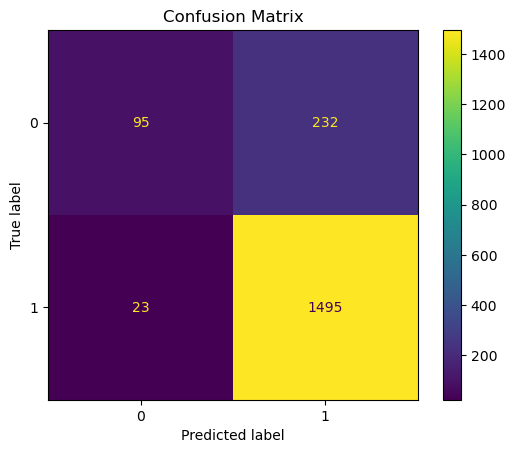

In [59]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay


cm = confusion_matrix(y_test, y_pred_forest_pipeline)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=model_best.classes_)
disp.plot()
disp.ax_.set(title='Confusion Matrix')


In [53]:
import joblib

In [54]:
joblib.dump(param_search.best_estimator_, 'best_estimator.pkl', compress = 1)

[CV 4/5] END randomforestclassifier__max_features=100, randomforestclassifier__n_estimators=150;, score=0.843 total time= 4.8min
[CV 3/5] END randomforestclassifier__max_features=100, randomforestclassifier__n_estimators=200;, score=0.846 total time= 4.8min
[CV 2/5] END randomforestclassifier__max_features=150, randomforestclassifier__n_estimators=150;, score=0.856 total time= 4.6min
[CV 1/5] END randomforestclassifier__max_features=150, randomforestclassifier__n_estimators=200;, score=0.855 total time= 4.9min
[CV 5/5] END randomforestclassifier__max_features=150, randomforestclassifier__n_estimators=200;, score=0.857 total time= 4.7min
[CV 4/5] END randomforestclassifier__max_features=250, randomforestclassifier__n_estimators=150;, score=0.865 total time= 4.6min
[CV 3/5] END randomforestclassifier__max_features=250, randomforestclassifier__n_estimators=200;, score=0.861 total time= 4.7min


['best_estimator.pkl']

[CV 1/5] END randomforestclassifier__max_features=100, randomforestclassifier__n_estimators=150;, score=0.846 total time= 4.6min
[CV 5/5] END randomforestclassifier__max_features=100, randomforestclassifier__n_estimators=150;, score=0.848 total time= 4.8min
[CV 4/5] END randomforestclassifier__max_features=100, randomforestclassifier__n_estimators=200;, score=0.844 total time= 4.7min
[CV 3/5] END randomforestclassifier__max_features=150, randomforestclassifier__n_estimators=150;, score=0.854 total time= 4.6min
[CV 2/5] END randomforestclassifier__max_features=150, randomforestclassifier__n_estimators=200;, score=0.855 total time= 4.7min
[CV 1/5] END randomforestclassifier__max_features=250, randomforestclassifier__n_estimators=150;, score=0.868 total time= 4.6min
[CV 5/5] END randomforestclassifier__max_features=250, randomforestclassifier__n_estimators=150;, score=0.867 total time= 4.5min
[CV 4/5] END randomforestclassifier__max_features=250, randomforestclassifier__n_estimators=200;,